In [ ]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn import preprocessing


In [ ]:
movies=pd.read_csv("movie_metadata.csv")

In [ ]:
movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
print('Shape:',movies.shape)

Shape: (5043, 28)


In [ ]:
#for movie credits
tab_info=pd.DataFrame(movies.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(movies.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(movies.isnull().sum()/movies.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
column type,object,object,float64,float64,float64,float64,object,float64,float64,object,...,float64,object,object,object,float64,float64,float64,float64,float64,int64
null values,19,104,50,15,104,23,13,7,884,0,...,21,12,5,303,492,108,13,0,329,0
null values (%),0.37676,2.06226,0.991473,0.297442,2.06226,0.456078,0.257783,0.138806,17.5292,0,...,0.416419,0.237954,0.0991473,6.00833,9.7561,2.14158,0.257783,0,6.52389,0


In [ ]:
missing_df = movies.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (movies.shape[0] 
                                - missing_df['missing_count']) / movies.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,gross,884,82.470752
1,budget,492,90.243902
2,aspect_ratio,329,93.476105
3,content_rating,303,93.991672
4,plot_keywords,153,96.966092
5,title_year,108,97.858418
6,director_name,104,97.937735
7,director_facebook_likes,104,97.937735
8,num_critic_for_reviews,50,99.008527
9,actor_3_facebook_likes,23,99.543922


In [ ]:
movies['gross'] = movies['gross'].fillna((movies['gross'].mean()))

In [ ]:
movies['budget'] = movies['budget'].fillna((movies['budget'].mean()))

In [ ]:
movies['aspect_ratio'] = movies['aspect_ratio'].fillna((movies['aspect_ratio'].mean()))

In [ ]:
movies['title_year'] = movies['title_year'].fillna((movies['title_year'].mean()))

In [ ]:
movies['director_facebook_likes'] = movies['director_facebook_likes'].fillna((movies['director_facebook_likes'].mean()))

In [ ]:
movies['num_critic_for_reviews'] = movies['num_critic_for_reviews'].fillna((movies['num_critic_for_reviews'].mean()))

In [ ]:
movies['actor_3_facebook_likes'] = movies['actor_3_facebook_likes'].fillna((movies['actor_3_facebook_likes'].mean()))

In [ ]:
movies['num_user_for_reviews'] = movies['num_user_for_reviews'].fillna((movies['num_user_for_reviews'].mean()))

In [ ]:
movies['duration'] = movies['duration'].fillna((movies['duration'].mean()))

In [ ]:
movies['actor_2_facebook_likes'] = movies['actor_2_facebook_likes'].fillna((movies['actor_2_facebook_likes'].mean()))

In [ ]:
movies['actor_1_facebook_likes'] = movies['actor_1_facebook_likes'].fillna((movies['actor_1_facebook_likes'].mean()))

In [ ]:
#remove irrelevant columns
movies.drop(['color','facenumber_in_poster','language','movie_imdb_link'],axis=1, inplace=True)

In [ ]:
movies.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
num_user_for_reviews           0
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [ ]:
#Cleaning for categorical data
movies.fillna(method='ffill', inplace=True)

In [ ]:
movies.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#new cloumn which has cast popularity, it is derived from mean of actors ratings
movies['popularity']=(movies['actor_1_facebook_likes']+movies['actor_2_facebook_likes']+movies["actor_3_facebook_likes"]).mean()

In [ ]:
movies['profit']=movies['budget']-movies['gross']

In [ ]:
movies.head(4)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,popularity,profit,film_count
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,8856.811295,-523505847.0,7
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8856.811295,-9404152.0,7
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,8856.811295,44925825.0,8
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,8856.811295,-198130642.0,8


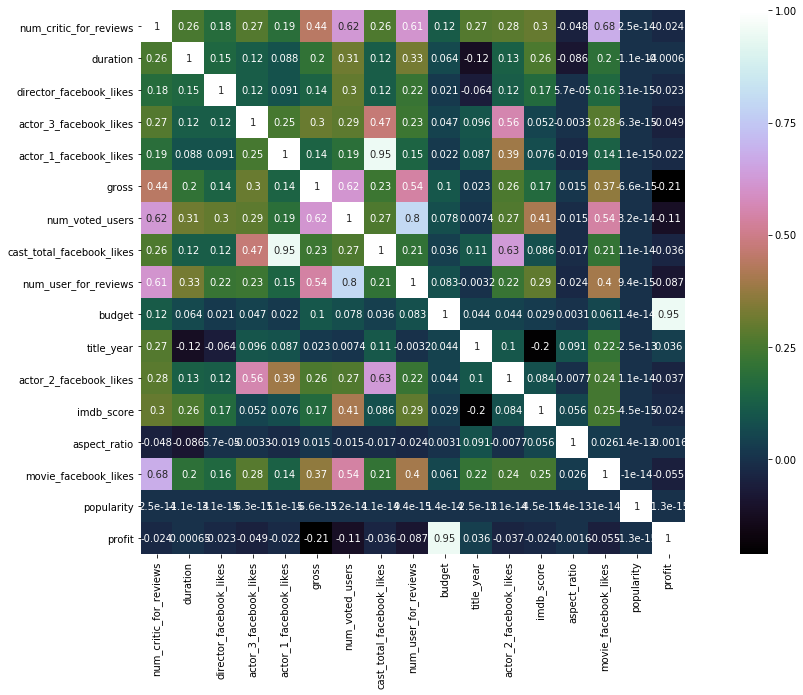

In [ ]:
#Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat=movies.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [ ]:
#visualization
movies[movies['imdb_score']>7.5].shape[0]

747

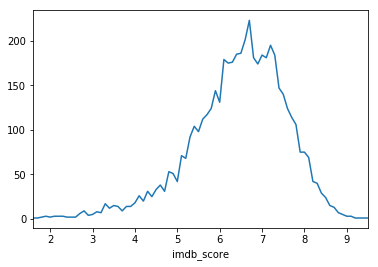

In [ ]:
#747 out of 5043 movies are having more than 7.5 imdb rating.
#Genrally people watch this king of rating movies
data_groupby_ratings = movies.groupby(['imdb_score'])['movie_title'].count()
data_groupby_ratings.plot()
#we can see more than 200  movies have rating of around 6.5

In [ ]:
name_counts = movies['director_name'].value_counts()
movies['film_count'] = movies['director_name'].map(name_counts) # match the film count to the director
print(name_counts)

Steven Spielberg              27
Woody Allen                   22
Martin Scorsese               20
Clint Eastwood                20
Ridley Scott                  18
Spike Lee                     17
Steven Soderbergh             16
Tim Burton                    16
John Carpenter                15
Renny Harlin                  15
Joel Schumacher               14
Sam Raimi                     14
Oliver Stone                  14
Barry Levinson                13
Robert Rodriguez              13
Robert Zemeckis               13
Ron Howard                    13
Michael Bay                   13
Peter Jackson                 12
Richard Donner                12
Tony Scott                    12
Kevin Smith                   12
Brian De Palma                12
Wes Craven                    12
Stephen Frears                12
Shawn Levy                    12
Rob Cohen                     11
Rob Reiner                    11
Chris Columbus                11
Bobby Farrelly                11
          

In [ ]:
#subset with directors having more than 5 movies
dir_subset = movies[movies['film_count'] > 5]

In [ ]:
#arranging that subset based on avg imdb_score of there movies
movies['profit']=(movies['budget']-movies['gross'])
top10pro = dir_subset.sort_values(ascending = False, by = 'imdb_score')[['director_name','imdb_score','profit']].head(10)
top10pro.head(10)

,director_name,imdb_score,profit
3466,Francis Ford Coppola,9.2,1.408220e+08
3481,Michael Winterbottom,9.0,8.822103e+07
2837,Francis Ford Coppola,9.0,7.030000e+07
66,Christopher Nolan,9.0,7.183161e+08
339,Peter Jackson,8.9,4.710193e+08
1874,Steven Spielberg,8.9,1.180672e+08
4822,Sidney Lumet,8.9,4.881841e+07
3355,Quentin Tarantino,8.9,1.159300e+08
270,Peter Jackson,8.8,4.068376e+08
683,David Fincher,8.8,1.000234e+08


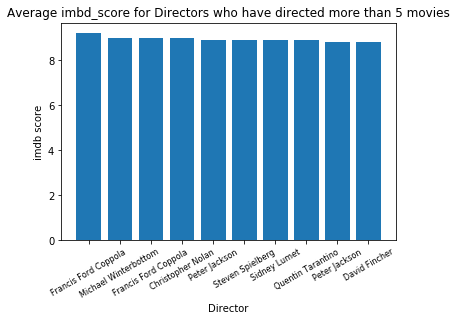

In [ ]:
index = np.arange(len(top10pro['director_name']))
plt.bar(index,top10pro['imdb_score'])
plt.xlabel('Director', fontsize=10)
plt.ylabel('imdb score', fontsize=10)
plt.xticks(index,top10pro['director_name'] , fontsize=8, rotation=30)
plt.title('Average imbd_score for Directors who have directed more than 5 movies')
plt.show()
# As we can see most of them have high score, so we can say experience of director help in success of a movie
#Francis Ford Movies have more imdb_score in average

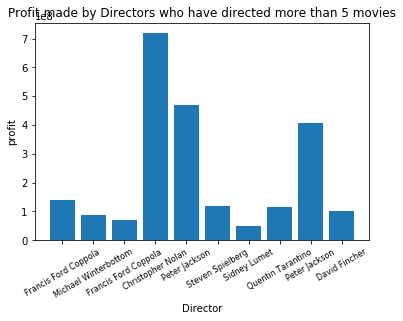

In [ ]:
index = np.arange(len(top10pro['director_name']))
plt.bar(index,top10pro['profit'])
plt.xlabel('Director', fontsize=10)
plt.ylabel('profit', fontsize=10)
plt.xticks(index,top10pro['director_name'] , fontsize=8, rotation=30)
plt.title('Profit made by Directors who have directed more than 5 movies')
plt.show()
# As we can see Francis and Christopher have both good imdb_score and profit. So they have high chances of making succesful movies on an average

In [ ]:
movies["profit"].corr(movies["budget"])

0.9506547433626985

In [ ]:
import bokeh.palettes
from bokeh.models import NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
genres = ["Drama","Comedy","Action","Adventure","Crime","Science", "Fiction","Family"]
grouped_data = movies[movies["genres"].isin(genres)].groupby(["genres","title_year"]).profit.mean().reset_index()
dict_group_data = {"xs":[grouped_data.loc[(grouped_data["genres"]==name),"title_year"].values \
                         for name in grouped_data['genres'].unique()],
                  "ys": [grouped_data.loc[(grouped_data["genres"]==name),"profit"].values\
                         for name in grouped_data['genres'].unique()],
                  "labels": grouped_data["genres"].unique(),
                  "color": bokeh.palettes.Category10[9]}

source = ColumnDataSource(dict_group_data)

hover = HoverTool(tooltips=[
    ("Genre", "@labels"),
])

p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Profit', 
           width = 1000,
           tools=[hover, "save","pan","box_zoom","reset","wheel_zoom"]) 
p.yaxis[0].formatter = NumeralTickFormatter(format="$,")

p.multi_line(xs= "xs", ys= "ys", line_color= "color", source = source, legend = "labels",line_width=3)
p.legend.location = "top_left"

p.title.text = "Profit for each Genre across years"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

In [ ]:
min(movies.budget.values)

218.0

In [ ]:
min(movies[movies.budget>10000].budget.values)

13000.0

In [ ]:
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
from chart_studio.widgets import GraphWidget

layout = go.Layout(
    title='Profit vs. Popularity',
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 6e8],
        zerolinewidth=3,
        ticklen=1,
        gridwidth=1,
    ),
    xaxis=dict(
        title='Popularity',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 1200],
        zerolinewidth=3,
        ticklen=5,
        gridwidth=1,
    )
)
data = [go.Scatter(
    y=movies[movies.budget>5000].profit.values,
    x=movies[movies.budget>5000].actor_1_facebook_likes.values,  
    mode='markers',
    text= movies[movies.budget>5000].movie_title.values, # Movie Titles
    marker=dict(
        size=3*(movies[movies.budget>5000].imdb_score),
        sizeref=1.0,
        color=movies[movies.budget>5000].imdb_score.values,
                
        colorbar=ColorBar(title='Average Rating<br> &nbsp;' , tickvals=[0,1.5,3,5,7,8.5]),

        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#profit increases with popularity of actors. imbd_score independent of actors popularity
#Avtar is most popular n profit earning movie

In [ ]:
#hypothesis test
# People generally watch movies with imdb_score more than 7.
# H0 : u<7 Movie is a Scucess
#H1  : u>=7
from scipy.stats import ttest_1samp
#for testing average imdb score is 7 or not
imdb_mean=movies['imdb_score'].mean()
print(imdb_mean)

6.442137616498111


In [ ]:

tset, pval = ttest_1samp(movies['imdb_score'], 7)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

4.964371807132384e-243
 we are rejecting null hypothesis


Text(0.5, 1.0, 'Normalized data')

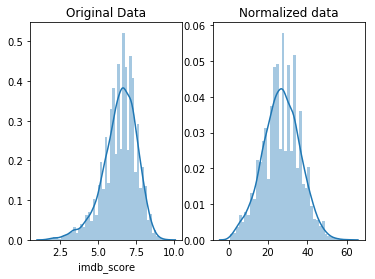

In [ ]:
from scipy import stats
normalized_data = stats.boxcox(movies['imdb_score'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(movies['imdb_score'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")